In [1]:
import copy
from typing import Tuple

import matplotlib.pyplot as plt
import numpy as np
import open3d as o3d
import pandas as pd
from tqdm.auto import tqdm

In [2]:
print(o3d.__version__)

0.18.0


In [44]:
xl = pd.ExcelFile("./data/PARA-F1_slices.xlsx")
sheet_names = xl.sheet_names
print("Available sheets:", sheet_names)

# Read all sheets and merge into a single dataframe
all_data = pd.concat(
    [pd.read_excel(xl, sheet_name=sheet) for sheet in sheet_names], ignore_index=True
)


def parse_coordinates(coord_str: str) -> Tuple[float, float, float]:
    """Parse coordinate string in format 'x: val\ny: val\nz: val' into (x,y,z) tuple"""
    coords = {}
    for line in coord_str.split("\n"):
        axis, value = line.split(":")
        coords[axis] = float(value)
    return (coords["x"], coords["y"], coords["z"])


# Parse start and end coordinates into tuples
all_data["Start Tuple"] = all_data["Start coordinates"].apply(parse_coordinates)
all_data["End Tuple"] = all_data["End coordinates"].apply(parse_coordinates)
# Rename the unnamed column to 'name'
all_data = all_data.rename(columns={"Unnamed: 0": "name"})

all_data

Available sheets: ['Full "A" Slices', 'Partial "B" Slices']


,name,Start coordinates,End coordinates,Angle (degree),Start Tuple,End Tuple
0,Slice A1,x: -0.411596\ny: 0.073296\nz: 0.181274,x: -2.085016\ny: -0.426978\nz: 0.172669,163.355799,"(-0.411596, 0.073296, 0.181274)","(-2.085016, -0.426978, 0.172669)"
1,Slice A2,x: 0.024223\ny: 0.068585\nz: 0.178593,x: 1.363758\ny: 0.523089\nz: 0.077229,341.257927,"(0.024223, 0.068585, 0.178593)","(1.363758, 0.523089, 0.077229)"
2,Slice A3,x: -0.301445\ny: -0.196648\nz: 0.175626,x: -2.056099\ny: -0.710611\nz: 0.154942,163.673939,"(-0.301445, -0.196648, 0.175626)","(-2.056099, -0.710611, 0.154942)"
3,Slice B1,x: -0.901181\ny: -0.055905\nz: 0.160836,x: -1.365537\ny: -0.173723\nz: 0.227663,165.763140,"(-0.901181, -0.055905, 0.160836)","(-1.365537, -0.173723, 0.227663)"
4,Slice B2,x: -0.953346\ny: 0.083566\nz: 0.184735,x: -1.372778\ny: 0.167421\nz: 0.23225,191.305812,"(-0.953346, 0.083566, 0.184735)","(-1.372778, 0.167421, 0.23225)"
5,Slice B3,x: -0.616526\ny: 0.259812\nz: 0.216229,x: -0.925131\ny: 0.828011\nz: 0.196502,241.492382,"(-0.616526, 0.259812, 0.216229)","(-0.925131, 0.828011, 0.196502)"
6,Slice B4,x: -0.452423\ny: 0.30977\nz: 0.226759,x: -0.485751\ny: 0.837297\nz: 0.213237,266.385014,"(-0.452423, 0.30977, 0.226759)","(-0.485751, 0.837297, 0.213237)"
7,Slice B5,x: -0.30244\ny: 0.217813\nz: 0.224112,x: -0.039978\ny: 0.767101\nz: 0.212416,295.539483,"(-0.30244, 0.217813, 0.224112)","(-0.039978, 0.767101, 0.212416)"
8,Slice B6,x: -0.105881\ny: 0.232929\nz: 0.215456,x: 0.345643\ny: 0.588319\nz: 0.197115,321.794059,"(-0.105881, 0.232929, 0.215456)","(0.345643, 0.588319, 0.197115)"
9,Slice B7,x: 0.115773\ny: -0.109477\nz: 0.173592,x: 0.671659\ny: 0.006251\nz: 0.19878,348.239766,"(0.115773, -0.109477, 0.173592)","(0.671659, 0.006251, 0.19878)"


In [3]:
MODEL_NAME = "PARAF1_SfM_10Jan24"
MODEL_PATH = f"./data/{MODEL_NAME}.ply"

In [4]:
point_cloud = o3d.io.read_point_cloud(MODEL_PATH)

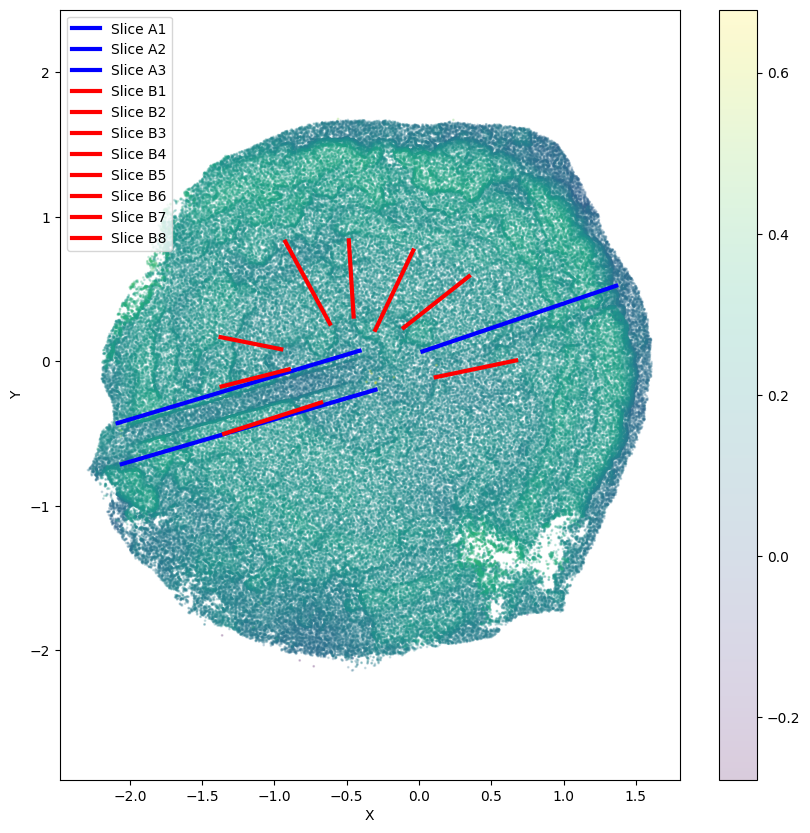

In [49]:
points = np.asarray(point_cloud.points)
points_sparse = points[::100]  # for plotting quick
plt.figure(figsize=(10, 10))
plt.scatter(
    points_sparse[:, 0], points_sparse[:, 1], c=points_sparse[:, 2], s=1, alpha=0.2
)

for i in range(len(all_data)):
    partial = "Slice B" in all_data["name"].iloc[i]
    plt.plot(
        [all_data["Start Tuple"].iloc[i][0], all_data["End Tuple"].iloc[i][0]],
        [all_data["Start Tuple"].iloc[i][1], all_data["End Tuple"].iloc[i][1]],
        c="r" if partial else "b",
        linewidth=3,
        label=all_data["name"].loc[i],
    )

plt.axis("equal")
plt.xlabel("X")
plt.ylabel("Y")
plt.colorbar()
plt.legend()
plt.show()

In [95]:
# extract slice for a sample profile
sample = all_data.iloc[-2]
sample

name                                               Slice B7
Start coordinates    x: 0.115773\ny: -0.109477\nz: 0.173592
End coordinates        x: 0.671659\ny: 0.006251\nz: 0.19878
Angle (degree)                                   348.239766
Start Tuple                 (0.115773, -0.109477, 0.173592)
End Tuple                     (0.671659, 0.006251, 0.19878)
Name: 9, dtype: object

# Extracting slices


In [96]:
bb = point_cloud.get_axis_aligned_bounding_box()
z_min, z_max = bb.min_bound[-1], bb.max_bound[-1]
start_tuple = sample["Start Tuple"]
end_tuple = sample["End Tuple"]

# Create oriented bounding box from start to end points
thickness = 0.01  # Same thickness as used above

# Calculate direction vector from start to end
direction = np.array(end_tuple) - np.array(start_tuple)
length = np.linalg.norm(direction)
direction = direction / length

# Calculate rotation matrix to align box with direction
# The direction vector becomes the x-axis of the new coordinate system
z_axis = np.array([0, 0, 1])
y_axis = np.cross(z_axis, direction)
y_axis = y_axis / np.linalg.norm(y_axis)
rotation_matrix = np.vstack((direction, y_axis, z_axis)).T

# Create oriented bounding box
center_point = (np.array(start_tuple) + np.array(end_tuple)) / 2
extent = np.array([length, thickness, z_max - z_min])

bb_slice = o3d.geometry.OrientedBoundingBox(
    center=center_point, R=rotation_matrix, extent=extent
)

bb_slice.color = (1, 0, 0)

slice = point_cloud.select_by_index(
    bb_slice.get_point_indices_within_bounding_box(point_cloud.points)
)
df = pd.DataFrame(np.asarray(slice.points), columns=["x", "y", "z"])

# o3d.visualization.draw([point_cloud, bb_slice])

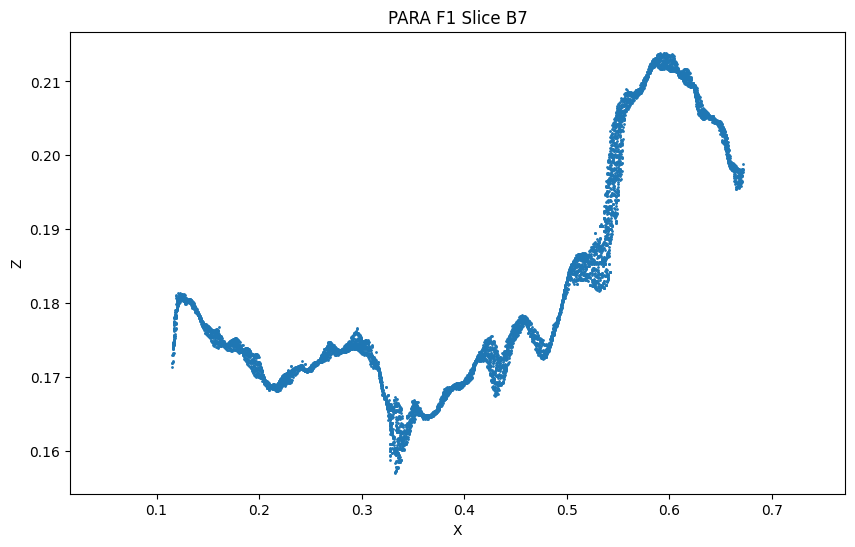

In [97]:
start_x = start_tuple[0]
end_x = end_tuple[0]

padding = 0.1  # 10cm padding
if start_x <= end_x:
    plot_start = start_x - padding
    plot_end = end_x + padding
else:
    plot_start = start_x + padding
    plot_end = end_x - padding

plt.rcParams["figure.figsize"] = (10, 6)
f = plt.scatter(df["x"], df["z"], s=1)
plt.xlabel("X")
plt.ylabel("Z")
plt.xlim(plot_start, plot_end)
plt.title(f"PARA F1 {sample['name']}")
plt.show()

In [67]:
df.to_csv(f"out/PARA-F1 {sample['name']}.csv", index=False)  # Removes the index column